In [0]:
!pip install pydot

In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

In [0]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [0]:
X.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [0]:
y = pd.get_dummies(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [0]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)
dt.get_depth()

5

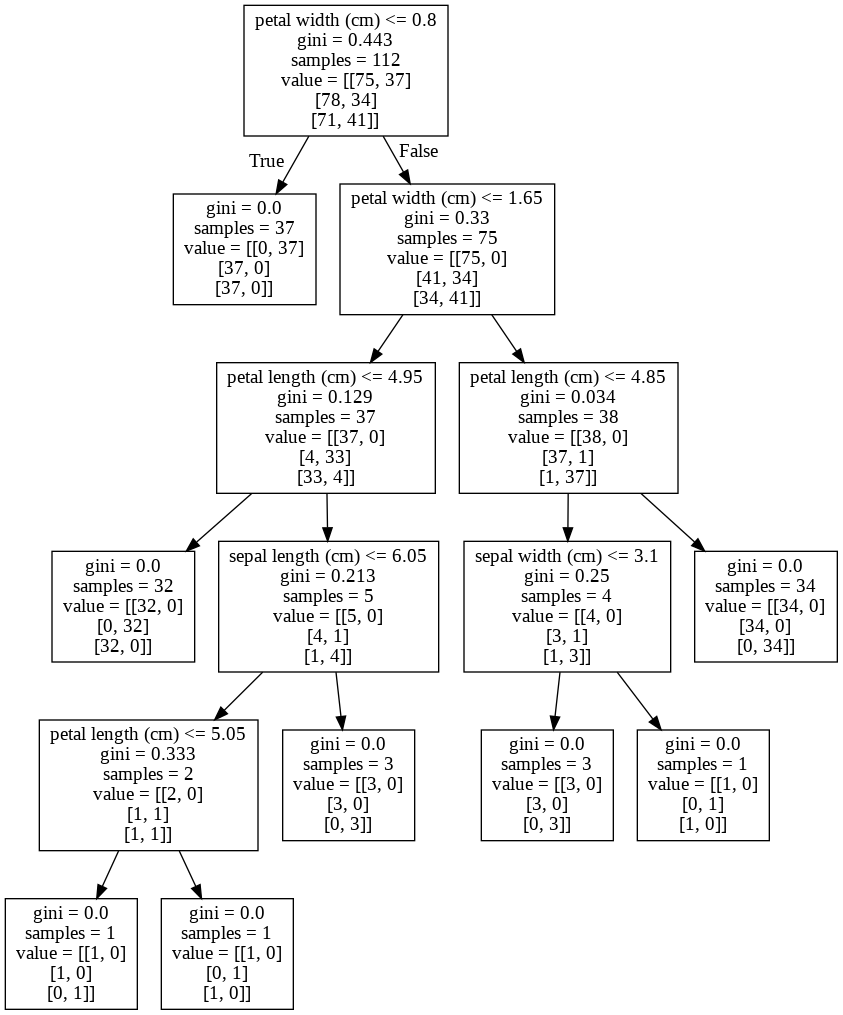

In [0]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [0]:
y_pred = dt.predict(X_test)

In [0]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

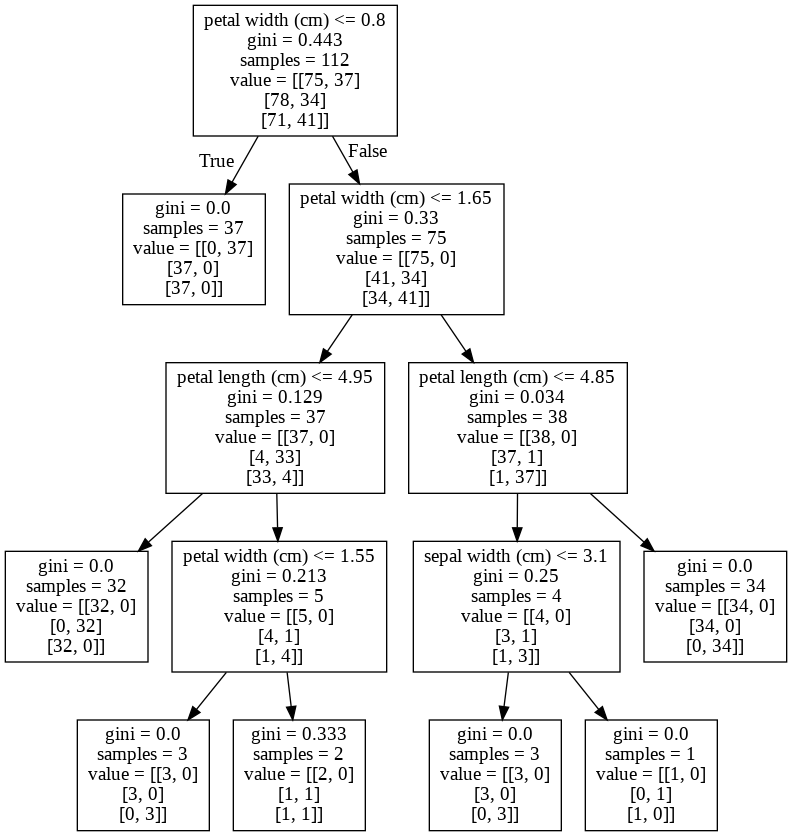

In [0]:
dt_lvl2 = DecisionTreeClassifier(max_depth=5)
dt_lvl2.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(dt_lvl2, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [0]:
y_predlvl2 = dt_lvl2.predict(X_test)

In [0]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_predlvl2).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

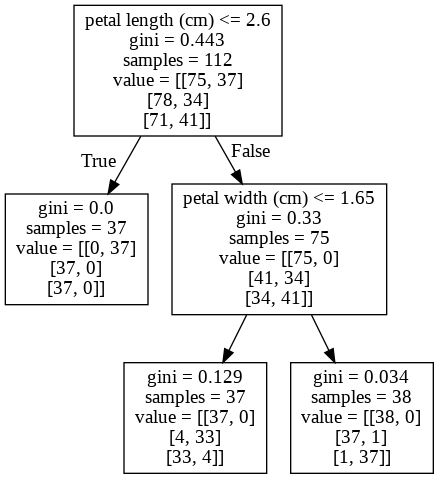

In [0]:
dt_lvl3 = DecisionTreeClassifier(max_depth=4)
dt_lvl3.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(dt_lvl3, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [0]:
y_predlvl3 = dt_lvl3.predict(X_test)

In [0]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_predlvl3).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

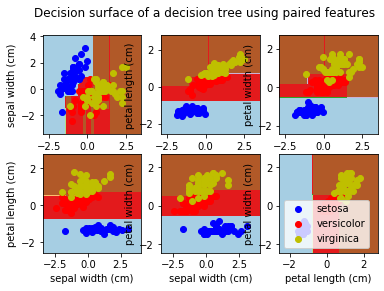

In [0]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

Cross Validation of Decision Tree with max_depth of 4 to 6.

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(4,6)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters,n_jobs=5)
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9464285714285714 {'max_depth': 5}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy of Logistic regression classifier on training set: 0.98
Accuracy of Logistic regression classifier on test set: 0.97


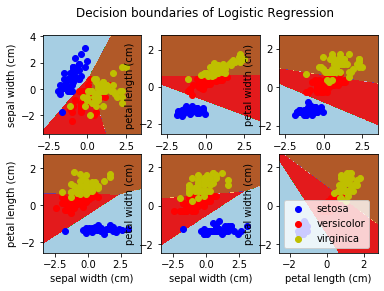

In [0]:
#Simple Classifier
from sklearn.linear_model import LogisticRegression
Xlog, ylog = load_iris(return_X_y=True)
X_trainlog, X_testlog, y_trainlog, y_testlog = train_test_split(Xlog, ylog, random_state=1)
logreg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
logreg.fit(X_trainlog, y_trainlog)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_trainlog, y_trainlog)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_testlog, y_testlog)))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = Xlog[:, pair]
    y = ylog

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    logreg.fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision boundaries of Logistic Regression")
plt.legend()
plt.show()


In [0]:
logreg.coef_


array([[-2.58814921, -2.30794965],
       [ 0.13366331, -0.47260059],
       [ 2.45448589,  2.78055024]])